In [3]:
## rebooting, making a small set of tasks to try training dreamcoder
%load_ext autoreload
%autoreload 2

from dreamcoder.domains.sketch.sketchPrimitives import *
from dreamcoder.task import Program
from dreamcoder.domains.sketch.main import dreamOfSketches


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[((-2.2, 2), ''), ((-1.1, 2), ''), ((-1.1, 2), 'LL'), ((-1.1, 2), 'C'), ((1.1, 2), ''), ((1.1, 2), 'LL'), ((2.2, 2), ''), ((2.2, 2), 'LL'), ((3.3000000000000003, 2), ''), ((3.3000000000000003, 2), 'LL'), ((4.4, 2), ''), ((4.4, 2), 'LL'), ((5.5, 2), ''), ((-1.1, 2), 'C')]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

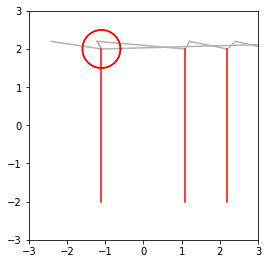

In [6]:
## making tasks - write down programs as strings

grid = "(loop 4 (lambda (i k) (LL (r 1 k))) k)"
# grid_embed = f"embed (lambda (k) {grid})"
vert1 = "embed (lambda (k) (r 2 k))"
# vert1 = "embed (lambda (k) (d 1 (C (d 1 (L k)))))"
vertG = lambda p1, p2, p3: f"embed (lambda (k) (d 1 ({p1} (d 1 ({p2} (d 1 ({p3} k)))))))"
V = lambda p1, p2, p3: f"embed (lambda (k) (d 1 ({p1} (d 1 ({p2} (d 1 ({p3} k)))))))"

plist = ("LLL", "LCL", "_L_", "___")


# good, but loops over vertical things
# p = Program.parseHumanReadable(f"(lambda (k) (embed (lambda (k) {grid}) (loop 4 (lambda (i k) ({vertG('L', 'C', 'L')} (r 1 k))) k)))")
# p = Program.parseHumanReadable(f"(lambda (k) (embed (lambda (k) {grid}) (loop 4 (lambda (i k) ({vertG(plist[1], 'C', 'L')} (r 1 k))) k)))")

p = Program.parseHumanReadable(f"(lambda (k) (embed (lambda (k) {grid}) ({vertG('L', 'L', 'L')} (r 1 (C k)))))")

p = Program.parseHumanReadable("(lambda (k) (r 1 (r 1 ( C (l 2 k) ))))")
# p = Program.parseHumanReadable("(lambda (x) (embed (lambda (x) (r 5 (x)))))")
# p = Program.parse("(lambda (loop 3 (lambda (lambda (u $1 $0)) (u 5 $0))))")
# p = Program.parseHumanReadable("(lambda (k) (loop 3 (lambda (i k) (r 2 k)) (C (loop 4 (lambda (i k) (d i (L k))) k))))")
# p = Program.parse("(lambda (C (u 4 (loop 5 (lambda (lambda (d 3 (u $1 (C $0))))) $0))))")

# p = Program.parseHumanReadable(f"(lambda (k) ({vertG('L', 'L', 'L')})")
p = Program.parseHumanReadable(f"(lambda (k) (r 1 (LL (C (embed (lambda (k) (r 2 {grid})) k)))))")

# (embed (lambda stuff) )
renderPlan(executeSketch(p)[0])



[((-2.2, 2), ''), ((-1.1, 2), ''), ((-1.1, 2), 'LL'), ((-1.1, 2), 'C'), ((1.1, 2), ''), ((1.1, 2), 'LL'), ((2.2, 2), ''), ((2.2, 2), 'LL'), ((3.3000000000000003, 2), ''), ((3.3000000000000003, 2), 'LL'), ((4.4, 2), ''), ((4.4, 2), 'LL'), ((5.5, 2), ''), ((-1.1, 2), 'C')]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


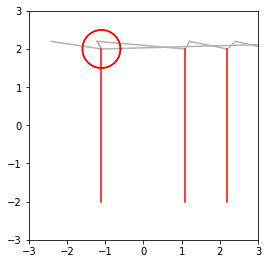

In [12]:
im = renderProgram(p)
print(im)

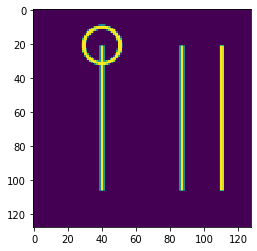

In [15]:
import matplotlib.pyplot as plt
plt.imshow(im)

In [78]:
v1

NameError: name 'v1' is not defined

In [83]:
## ---- make a library of vertical things
grid = "(loop 4 (lambda (i k) (LL (r 1 k))) k)"

def vertSampler():
    V = lambda p1, p2, p3: f"embed (lambda (k) (d 1 ({p1} (d 1 ({p2} (d 1 ({p3} k)))))))"
    
    v1 = V("L", "L", "L")
    v2 = V("C", "C", "C")
    import random 
    prand = lambda: random.sample(["L", "C", "E"], 1)[0]
    v3 = lambda: V(prand(), prand(), prand())
    v = lambda: random.sample([v1, v2, v3()], 1)[0]
    return v

p = lambda: Program.parseHumanReadable(f"(lambda (k) (embed (lambda (k) {grid}) ({v()} (r 1 ({v()} (r 1 ({v()} (r 1 ({v()} k)))))))))")
## make a library of horizontal things

# ==== make tasks
Tasks = [SupervisedSketch(f"task{i}", p) for i, p in enumerate(programs)]

TypeError: super(type, obj): obj must be an instance or subtype of type

[((-2.2, 2), ''), ((-2.2, 2), 'LL'), ((-1.1, 2), ''), ((-1.1, 2), 'LL'), ((0.0, 2), ''), ((0.0, 2), 'LL'), ((1.1, 2), ''), ((1.1, 2), 'LL'), ((2.2, 2), ''), ((-2.2, 2), '')]


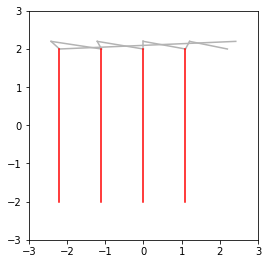

In [85]:
## ====== SIMPLE SHAPING TASKS

## ---- make a library of vertical things
grid = "(loop 4 (lambda (i k) (LL (r 1 k))) k)"

p =  Program.parseHumanReadable(f"(lambda (k) (embed (lambda (k) {grid}) (k)))")
# PAUSED HERRE-- SHOULD MAKE MORE IF DESIRE. FIND WAY TO ITERATE TO DO THIS EFFICIENTLY.

renderPlan(executeSketch(p)[0])

[((-2.2, 2), ''), ((-2.2, 2), 'LL'), ((-1.1, 2), ''), ((-1.1, 2), 'LL'), ((0.0, 2), ''), ((0.0, 2), 'LL'), ((1.1, 2), ''), ((1.1, 2), 'LL'), ((2.2, 2), ''), ((-2.2, 2), ''), ((-2.2, 1), ''), ((-2.2, 1), 'E'), ((-2.2, 0), ''), ((-2.2, 0), 'C'), ((-2.2, -1), ''), ((-2.2, -1), 'C'), ((-2.2, 2), ''), ((-1.1, 2), ''), ((-1.1, 1), ''), ((-1.1, 1), 'C'), ((-1.1, 0), ''), ((-1.1, 0), 'E'), ((-1.1, -1), ''), ((-1.1, -1), 'C'), ((-1.1, 2), ''), ((0.0, 2), ''), ((0.0, 1), ''), ((0.0, 1), 'L'), ((0.0, 0), ''), ((0.0, 0), 'L'), ((0.0, -1), ''), ((0.0, -1), 'C'), ((0.0, 2), ''), ((1.1, 2), ''), ((1.1, 1), ''), ((1.1, 1), 'L'), ((1.1, 0), ''), ((1.1, 0), 'L'), ((1.1, -1), ''), ((1.1, -1), 'L'), ((1.1, 2), '')]


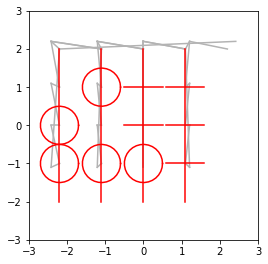

In [136]:
renderPlan(executeSketch(p())[0])

In [75]:
N = 50
programs = [p() for _ in range(N)]


[(lambda (embed (lambda (loop 4 (lambda (lambda (LL (r 1 $0)))) $0)) (embed (lambda (d 1 (L (d 1 (L (d 1 (L $0))))))) (r 1 (embed (lambda (d 1 (C (d 1 (C (d 1 (C $0))))))) (r 1 (embed (lambda (d 1 (C (d 1 (C (d 1 (C $0))))))) (r 1 (embed (lambda (d 1 (L (d 1 (L (d 1 (L $0))))))) $0))))))))),
 (lambda (embed (lambda (loop 4 (lambda (lambda (LL (r 1 $0)))) $0)) (embed (lambda (d 1 (C (d 1 (E (d 1 (E $0))))))) (r 1 (embed (lambda (d 1 (L (d 1 (L (d 1 (L $0))))))) (r 1 (embed (lambda (d 1 (L (d 1 (L (d 1 (L $0))))))) (r 1 (embed (lambda (d 1 (E (d 1 (L (d 1 (C $0))))))) $0))))))))),
 (lambda (embed (lambda (loop 4 (lambda (lambda (LL (r 1 $0)))) $0)) (embed (lambda (d 1 (L (d 1 (L (d 1 (L $0))))))) (r 1 (embed (lambda (d 1 (C (d 1 (C (d 1 (C $0))))))) (r 1 (embed (lambda (d 1 (C (d 1 (C (d 1 (C $0))))))) (r 1 (embed (lambda (d 1 (L (d 1 (C (d 1 (E $0))))))) $0))))))))),
 (lambda (embed (lambda (loop 4 (lambda (lambda (LL (r 1 $0)))) $0)) (embed (lambda (d 1 (L (d 1 (L (d 1 (L $0))))))) (r 

In [4]:
from dreamcoder.domains.sketch.makeSketchTasks import *


Tasks = [SupervisedSketch(f"task{i}", p) for i, p in enumerate(programs)]


NameError: name 'programs' is not defined

In [123]:
programs[0]

(lambda (embed (lambda (loop 4 (lambda (lambda (LL (r 1 $0)))) $0)) (embed (lambda (d 1 (C (d 1 (L (d 1 (E $0))))))) (r 1 (embed (lambda (d 1 (C (d 1 (E (d 1 (C $0))))))) (r 1 (embed (lambda (d 1 (L (d 1 (L (d 1 (L $0))))))) (r 1 (embed (lambda (d 1 (L (d 1 (L (d 1 (L $0))))))) $0)))))))))

In [126]:
programs[1]

(lambda (r 1 (l 1 (C $0))))

In [75]:
programs = [
    Program.parseHumanReadable("(lambda (k) (C k))"),
    Program.parseHumanReadable("(lambda (k) (r 1 (l 1 (C k))))")
]
# programs = [p() for _ in range(N)]

[executeSketch(p)[1] for p in programs]

Tasks = [SupervisedSketch(f"task{i}", p) for i, p in enumerate(programs)]


TypeError: super(type, obj): obj must be an instance or subtype of type

In [132]:

Tasks[1].logLikelihood(programs[0])

0.0

In [8]:
Tasks = makeSupervisedTasks()

SKETCH TASK, getting 20 tasks for training set: practice


[((-2.2, 2), ''), ((-2.2, 2), 'LL'), ((-1.1, 2), ''), ((-1.1, 2), 'LL'), ((0.0, 2), ''), ((0.0, 2), 'LL'), ((1.1, 2), ''), ((1.1, 2), 'LL'), ((2.2, 2), ''), ((-2.2, 2), ''), ((-2.2, 1), ''), ((-2.2, 1), 'C'), ((-2.2, 0), ''), ((-2.2, 0), 'L'), ((-2.2, -1), ''), ((-2.2, -1), 'E'), ((-2.2, 2), ''), ((-1.1, 2), ''), ((-1.1, 1), ''), ((-1.1, 1), 'E'), ((-1.1, 0), ''), ((-1.1, 0), 'L'), ((-1.1, -1), ''), ((-1.1, -1), 'L'), ((-1.1, 2), ''), ((0.0, 2), ''), ((0.0, 1), ''), ((0.0, 1), 'C'), ((0.0, 0), ''), ((0.0, 0), 'C'), ((0.0, -1), ''), ((0.0, -1), 'C'), ((0.0, 2), ''), ((1.1, 2), ''), ((1.1, 1), ''), ((1.1, 1), 'L'), ((1.1, 0), ''), ((1.1, 0), 'L'), ((1.1, -1), ''), ((1.1, -1), 'L'), ((1.1, 2), '')]
[((-2.2, 2), ''), ((-2.2, 2), 'LL'), ((-1.1, 2), ''), ((-1.1, 2), 'LL'), ((0.0, 2), ''), ((0.0, 2), 'LL'), ((1.1, 2), ''), ((1.1, 2), 'LL'), ((2.2, 2), ''), ((-2.2, 2), ''), ((-2.2, 1), ''), ((-2.2, 1), 'L'), ((-2.2, 0), ''), ((-2.2, 0), 'L'), ((-2.2, -1), ''), ((-2.2, -1), 'L'), ((-2.2, 2), ''

[None, None, None, None, None]

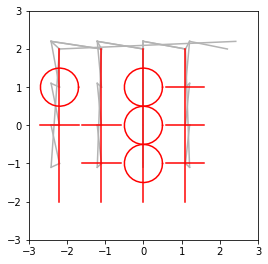

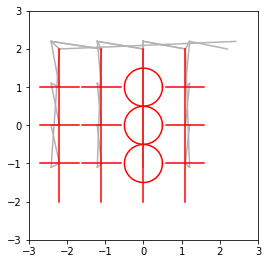

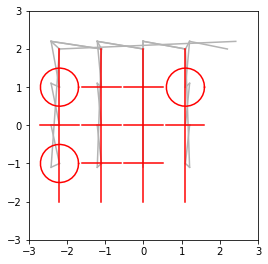

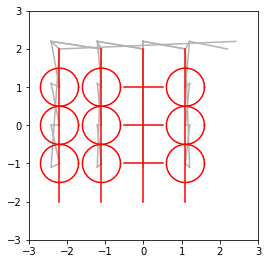

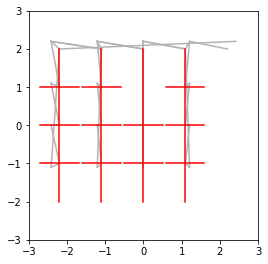

In [15]:
[renderPlan(t.hand) for t in Tasks[:5]]

In [18]:
dir(Tasks[0].original)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_parse',
 'annotateTypes',
 'applicationParse',
 'applicationParses',
 'betaNormalForm',
 'betaReduce',
 'body',
 'canHaveType',
 'clone',
 'closed',
 'evaluate',
 'freeVariables',
 'hashCode',
 'infer',
 'inferType',
 'isAbstraction',
 'isApplication',
 'isBetaLong',
 'isHole',
 'isIndex',
 'isInvented',
 'isPrimitive',
 'isUnion',
 'numberOfFreeVariables',
 'parse',
 'parseConstant',
 'parseHumanReadable',
 'runWithArguments',
 'shift',
 'show',
 'size',
 'substitute',
 'uncurry',
 'visit',
 'walk',
 'walkUncurried',
 'wellTyped']

In [34]:
type(Tasks[0].original)


dreamcoder.program.Abstraction

In [39]:
arrow(tsketch, tsketch).isArrow

<bound method TypeConstructor.isArrow of sketch -> sketch>

In [41]:
g0 = Grammar.uniform(primitives, continuationType=tsketch)
g0.logLikelihood(arrow(tsketch, tsketch), Tasks[0].original)

(lambda (embed (lambda (loop 4 (lambda (lambda (LL (r 1 $0)))) $0)) (embed (lambda (d 1 (C (d 1 (L (d 1 (E $0))))))) (r 1 (embed (lambda (d 1 (E (d 1 (L (d 1 (L $0))))))) (r 1 (embed (lambda (d 1 (C (d 1 (C (d 1 (C $0))))))) (r 1 (embed (lambda (d 1 (L (d 1 (L (d 1 (L $0))))))) $0))))))))) Not in candidates
Candidates is {E: (0.0, sketch -> sketch, Context(next = 0, {})), C: (0.0, sketch -> sketch, Context(next = 0, {})), L: (0.0, sketch -> sketch, Context(next = 0, {})), LL: (0.0, sketch -> sketch, Context(next = 0, {})), l: (0.0, int -> sketch -> sketch, Context(next = 0, {})), r: (0.0, int -> sketch -> sketch, Context(next = 0, {})), u: (0.0, int -> sketch -> sketch, Context(next = 0, {})), d: (0.0, int -> sketch -> sketch, Context(next = 0, {})), loop: (0.0, int -> (int -> sketch -> sketch) -> sketch -> sketch, Context(next = 0, {})), embed: (0.0, (sketch -> sketch) -> sketch -> sketch, Context(next = 0, {}))}
request is sketch
xs []
environment []


AssertionError: 

In [192]:
g0.logLikelihood(arrow(tsketch, tsketch), p)

-20.081103775592922

In [62]:
type(g0.sample(arrow(tsketch, tsketch)))

dreamcoder.program.Abstraction

In [204]:
## ====== SIMPLE SHAPING TASKS
programs = []

## ---- make a library of vertical things
def grid(N):
    G = f"(loop {N} (lambda (i k) (LL (r 1 k))) k)"
    return G

def progFromHumanString(s):
    """output a program given a human readible string"""
    return Program.parseHumanReadable(s)

# --- add grids (1 to 4)
programs = [progFromHumanString(f"(lambda (k) (embed (lambda (k) {grid(n+1)}) (k)))") for n in range(4)]
# --- as sanity check, add long veritcal line (should be identical to grid1, even though program much shoerter - CHECK)
programs.append(progFromHumanString("(lambda (k) (LL k))"))

# --- add all the vertical skewer types
def vertSampler2():
    V = lambda p1, p2, p3: f"lambda (k) (d 1 ({p1} (d 1 ({p2} (d 1 ({p3} k))))))"

    v1 = V("L", "L", "L")
    v2 = V("C", "C", "C")
    import random 
    prand = lambda: random.sample(["L", "C", "E"], 1)[0]
    v3 = lambda: V(prand(), prand(), prand())
    v = lambda: random.sample([v1, v2, v3()], 1)[0]
    return v

v = vertSampler2()
programs.extend([progFromHumanString(f"({v()})") for _ in range(10)])

print(len(programs))


15


[((-2.2, 2), ''), ((-2.2, 2), 'LL')]


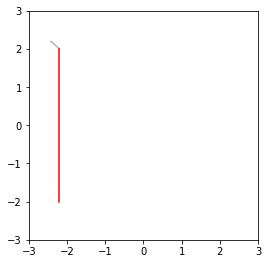

In [193]:
renderPlan(executeSketch(programs[4])[0])

In [194]:
programs

[(lambda (embed (lambda (loop 1 (lambda (lambda (LL (r 1 $0)))) $0)) $0)),
 (lambda (embed (lambda (loop 2 (lambda (lambda (LL (r 1 $0)))) $0)) $0)),
 (lambda (embed (lambda (loop 3 (lambda (lambda (LL (r 1 $0)))) $0)) $0)),
 (lambda (embed (lambda (loop 4 (lambda (lambda (LL (r 1 $0)))) $0)) $0)),
 (lambda (LL $0)),
 (lambda (d 1 (C (d 1 (C (d 1 (C $0))))))),
 (lambda (d 1 (C (d 1 (C (d 1 (C $0))))))),
 (lambda (d 1 (L (d 1 (L (d 1 (L $0))))))),
 (lambda (d 1 (L (d 1 (E (d 1 (C $0))))))),
 (lambda (d 1 (C (d 1 (C (d 1 (C $0))))))),
 (lambda (d 1 (C (d 1 (C (d 1 (C $0))))))),
 (lambda (d 1 (L (d 1 (L (d 1 (L $0))))))),
 (lambda (d 1 (C (d 1 (C (d 1 (C $0))))))),
 (lambda (d 1 (E (d 1 (L (d 1 (L $0))))))),
 (lambda (d 1 (C (d 1 (C (d 1 (C $0)))))))]

In [200]:
for p in programs:
    try:
        print(g0.logLikelihood(arrow(tsketch, tsketch), p))
    except:
        pass

-19.270173559376595
-19.270173559376595
-19.270173559376595


4 Not in candidates
Candidates is {1: (0.0, int, Context(next = 0, {})), 2: (0.0, int, Context(next = 0, {})), 3: (0.0, int, Context(next = 0, {}))}
request is int
xs []
environment [sketch, sketch]


-4.795790545596741
-20.081103775592922
-20.081103775592922
-20.081103775592922
-20.081103775592922
-20.081103775592922
-20.081103775592922
-20.081103775592922
-20.081103775592922
-20.081103775592922
-20.081103775592922


[((-2.2, 2), ''), ((-2.2, 2), 'LL'), ((-1.1, 2), ''), ((-2.2, 2), '')]


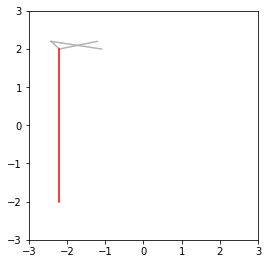

In [140]:
from dreamcoder.domains.sketch.sketchPrimitives import *
renderProgram(programs[0])

In [170]:
s = f"(lambda (k) ({v()}))"
p = lambda: Program.parseHumanReadable(s)
renderProgram(Program.parseHumanReadable(s))

TypeError: 'function' object is not subscriptable

In [167]:
p = Program.parseHumanReadable(s)
executeSketch(p)

<function dreamcoder.domains.sketch.sketchPrimitives._embed.<locals>.f.<locals>.g(hand)>

In [141]:
programs[9]

'embed (lambda (k) (d 1 (L (d 1 (L (d 1 (L k)))))))'

In [126]:
executeSketch(programs[5])

(handpos=(-2, 2), [((-2, 2), 'LL')])

In [61]:
type(Tasks[0].original)

dreamcoder.program.Abstraction

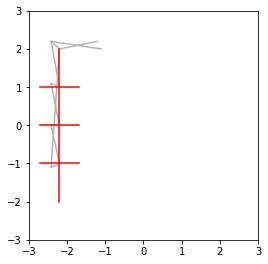

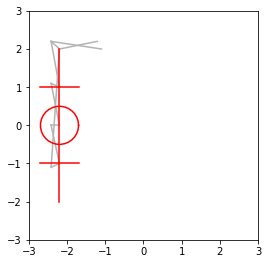

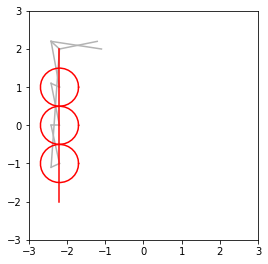

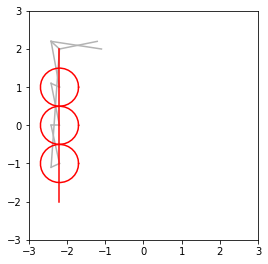

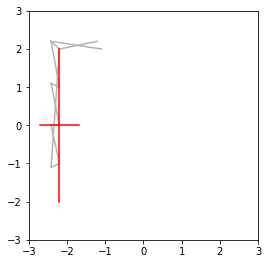

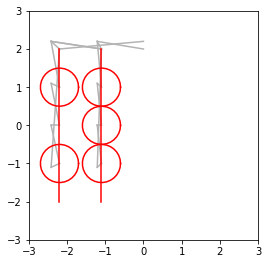

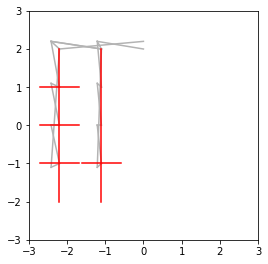

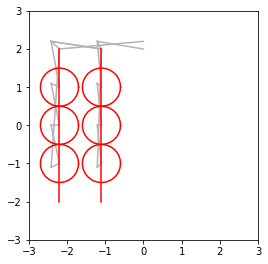

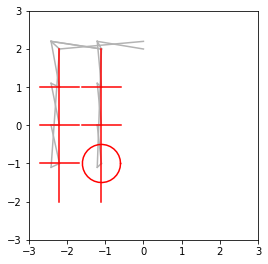

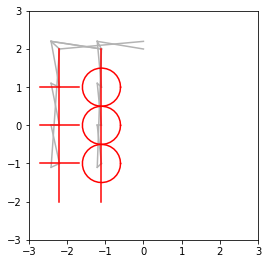

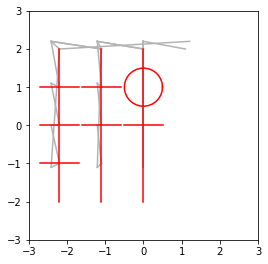

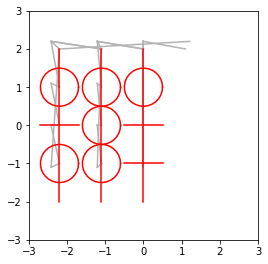

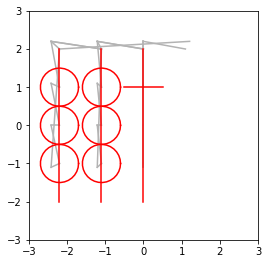

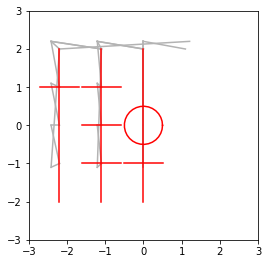

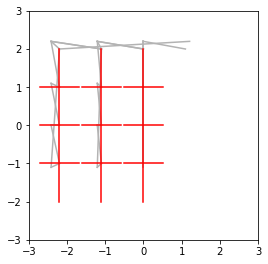

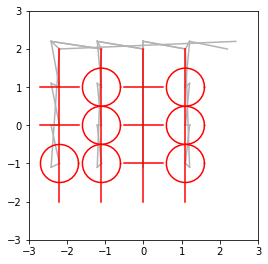

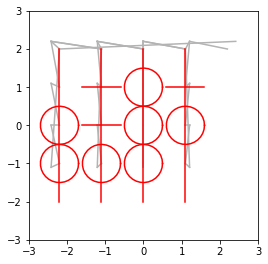

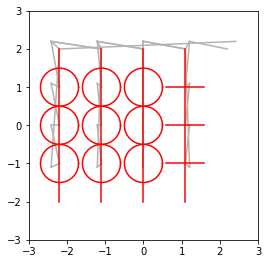

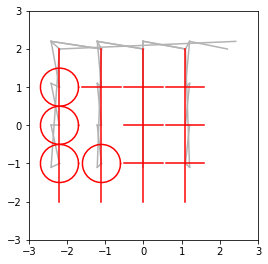

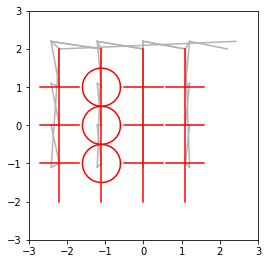

In [13]:
#### final code for making tasks

from dreamcoder.domains.sketch.makeSketchTasks import *

tasks = getTasks("practice", 20)
# TasksTrain = makeSupervisedTasks(trainset=["practice_shaping", "practice"], Nset=[20])
